# Exploratory Data Analysis for Students Performance in Exams Dataset

## Importing Libraries and Loading the Dataset

This code imports necessary libraries and loads the dataset named "StudentsPerformance.csv" into a pandas DataFrame, displaying the first five rows to provide an overview of the data.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset Statistics and Information

These lines present various aspects of the dataset, such as duplicated rows, summary statistics, and unique values in each column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
print(f"Number of the duplicated rows in dataset is: {df.duplicated().sum()}")
print(f"\nSome statistics for dataset:\n{df.describe().T}")

Number of the duplicated rows in dataset is: 0

Some statistics for dataset:
                count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0


In [24]:
print(f"Number of the unique values in each column:\n{df.nunique()}")
print(f"\nList of the unique values in gender column:\n{df['gender'].unique()}")
print(f"\nList of the unique values in race/ethnicity column:\n{df['race/ethnicity'].unique()}")
print(f"\nList of the unique values in parental level of education column:\n{df['parental level of education'].unique()}")
print(f"\nList of the unique values in lunch column:\n{df['lunch'].unique()}")
print(f"\nList of the unique values in test preparation course column:\n{df['test preparation course'].unique()}")

Number of the unique values in each column:
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

List of the unique values in gender column:
['female' 'male']

List of the unique values in race/ethnicity column:
['group B' 'group C' 'group A' 'group D' 'group E']

List of the unique values in parental level of education column:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

List of the unique values in lunch column:
['standard' 'free/reduced']

List of the unique values in test preparation course column:
['none' 'completed']


## Feature Types

This code identifies and prints the numerical and categorical features in the dataset, helping to distinguish between different types of variables.

In [29]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(exclude=['float64', 'int64']).columns

print('We have {} numerical features : {}'.format(len(numerical_features), list((numerical_features))))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), list(categorical_features)))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding Total and Average Scores

These lines of code add two new columns to the dataset: 'total score' and 'average score'. The 'total score' is calculated as the sum of the math, reading, and writing scores for each student, while the 'average score' represents the average of these three scores. The resulting DataFrame is displayed with the new columns.

In [31]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Analysis of Scores

This code calculates and prints the number of students who achieved full marks (100) in Math, Writing, and Reading. It also counts the number of students who scored less than or equal to 20 in these subjects, providing insights into extreme score distributions.

In [39]:
reading_full = df[df['reading score'] == 100].shape[0]
writing_full = df[df['writing score'] == 100].shape[0]
math_full = df[df['math score'] == 100].shape[0]

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [40]:
reading_less_20 = df[df['reading score'] <= 20].shape[0]
writing_less_20 = df[df['writing score'] <= 20].shape[0]
math_less_20 = df[df['math score'] <= 20].shape[0]

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Data Visualization: Histograms of Average and Total Scores

This code creates two sets of histograms. The first set visualizes the distribution of average scores, both overall and by gender. The second set does the same for total scores. The histograms include kernel density estimates (kde) for a smooth representation of the data. The plots are arranged in subplots for a clear comparison.

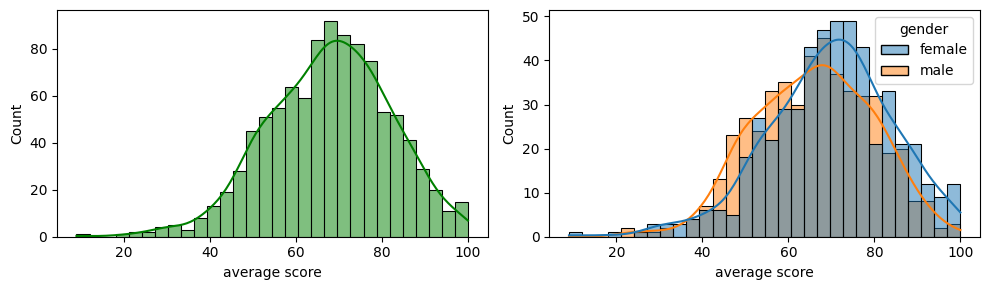

In [45]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average score', bins=30, kde=True, hue='gender')

plt.tight_layout();

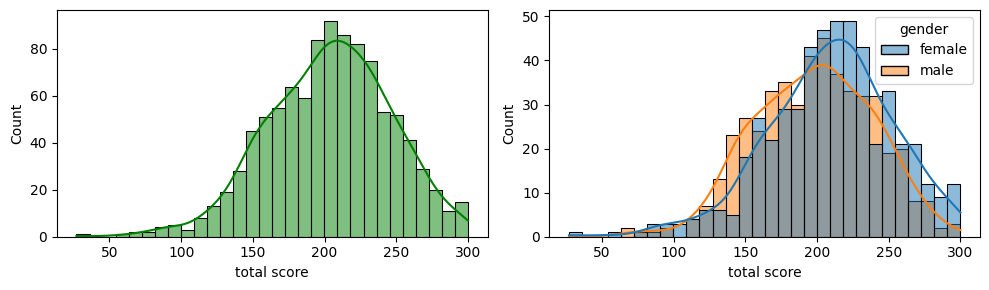

In [48]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total score', bins=30, kde=True, hue='gender')

plt.tight_layout();

Female students tend to perform well then male students.

## Data Visualization: Average Scores by Lunch and Gender

This code generates three histograms to visualize the distribution of average scores. The first histogram represents the overall distribution, while the second and third histograms focus on female and male students separately. Each histogram includes kernel density estimates (kde) and is differentiated by lunch type (standard or free/reduced). The plots are arranged in subplots for easy comparison.

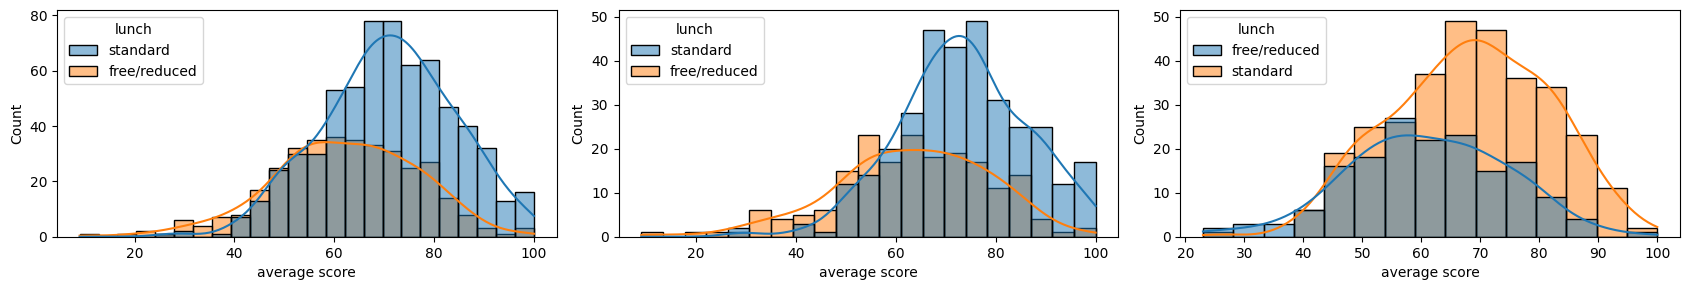

In [60]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='lunch')

plt.tight_layout();

Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

## Exploring Average Scores by Parental Level of Education and Gender

This code generates histograms to explore the distribution of average scores based on parental level of education. The first histogram represents the overall distribution, while the second and third histograms focus on female and male students separately. Each histogram includes kernel density estimates (kde) and is differentiated by parental level of education. The plots are arranged in subplots for easy comparison.

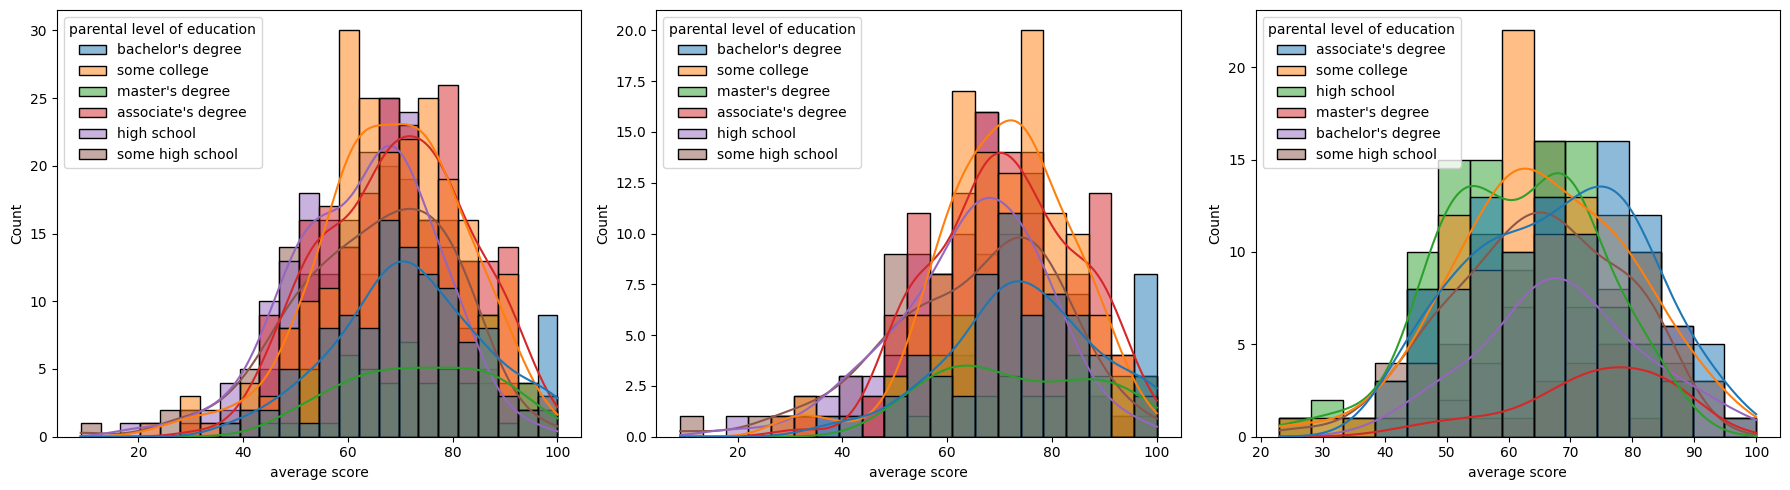

In [107]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='parental level of education')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='parental level of education')

plt.tight_layout();

## Exploring Average Scores by Race/Ethnicity and Gender

This code generates histograms to explore the distribution of average scores based on race/ethnicity. The first histogram represents the overall distribution, while the second and third histograms focus on female and male students separately. Each histogram includes kernel density estimates (kde) and is differentiated by race/ethnicity. The plots are arranged in subplots for easy comparison.

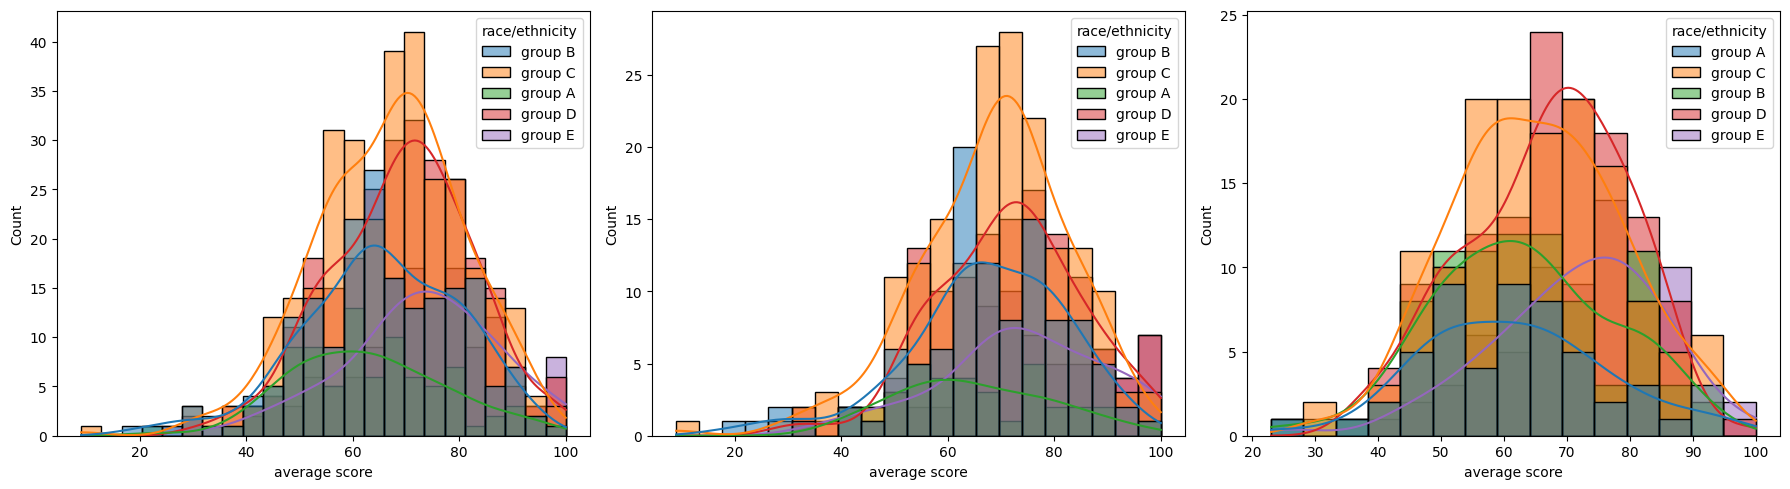

In [62]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='race/ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='race/ethnicity')

plt.tight_layout();

## Violin Plots for Math, Reading, and Writing Scores

This code creates three violin plots, one for each subject (Math, Reading, and Writing). Violin plots provide insights into the distribution of scores, showing the probability density at different values. Each subplot has a title indicating the subject, and the color of the violins corresponds to the respective subject. The plots are arranged in subplots for easy comparison.

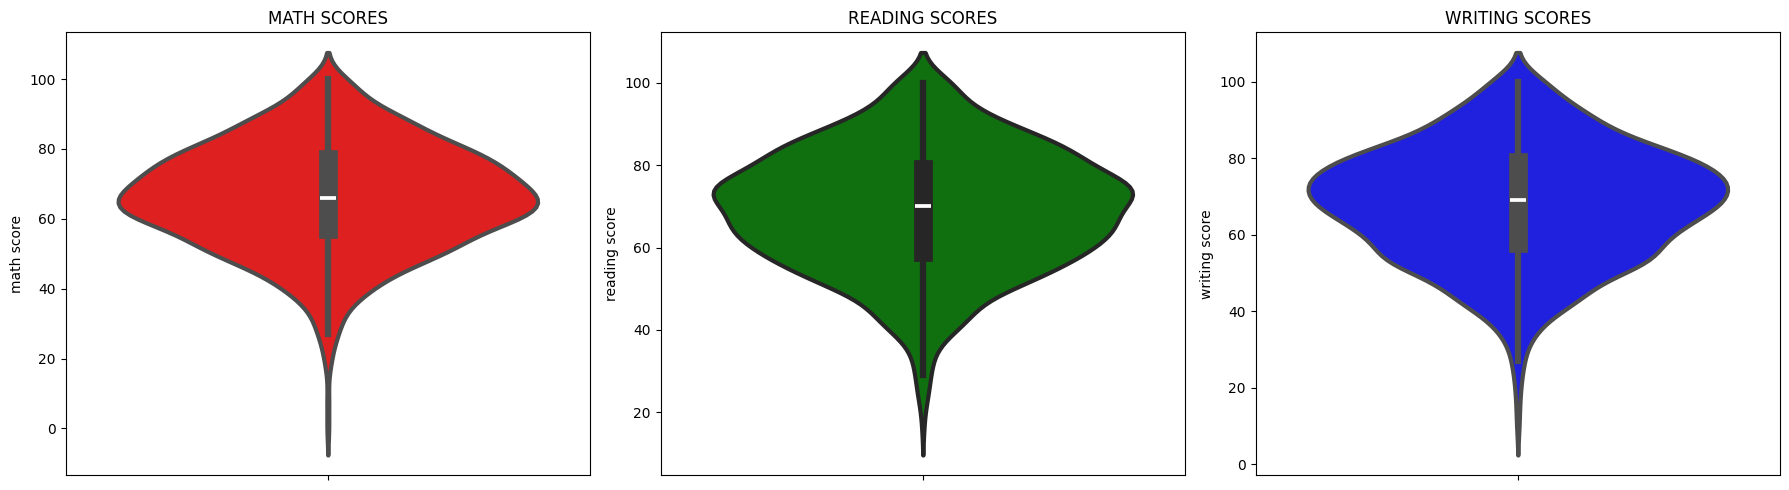

In [63]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)

plt.tight_layout();

## Pie Charts for Categorical Variables

This code creates five pie charts to visualize the distribution of categorical variables: Gender, Race/Ethnicity, Lunch, Test Preparation Course, and Parental Level of Education. Each subplot represents a different variable, and the pie charts display the proportion of each category. The plots are arranged in subplots for easy comparison.

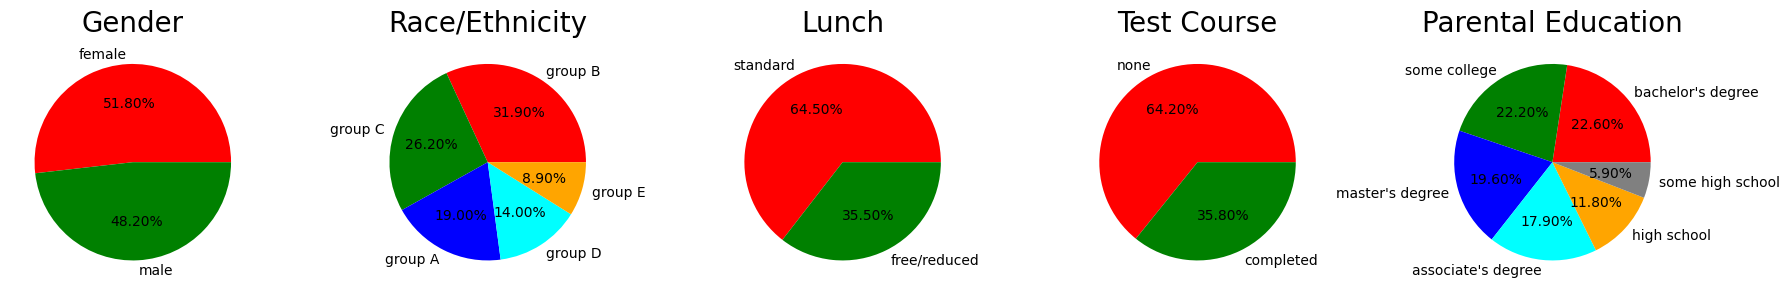

In [80]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = list(df['gender'].unique())
colors = ['red','green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = list(df['race/ethnicity'].unique())
colors = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = list(df['lunch'].unique())
colors = ['red','green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = list(df['test preparation course'].unique())
colors = ['red','green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = list(df['parental level of education'].unique())
colors = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout();

## Count Plot for Gender Distribution

This code generates a count plot to visualize the distribution of gender in the dataset. Each bar represents the count of male and female students, and the count values are displayed at the edge of the bars for better readability. The plot provides a quick overview of the gender distribution in the dataset.

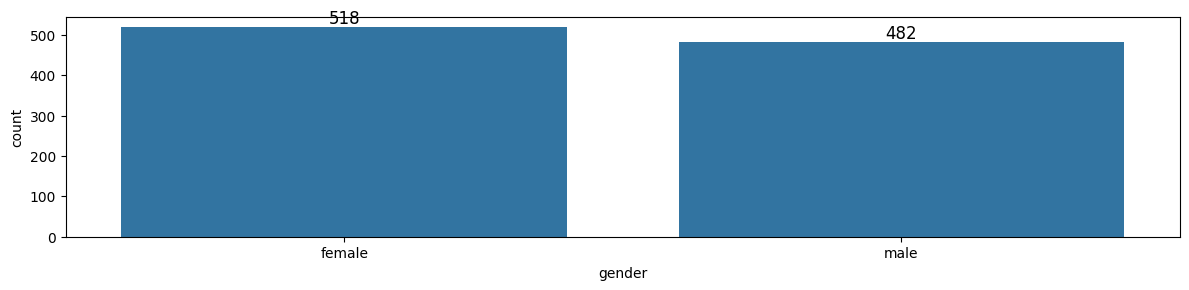

In [91]:
plt.figure(figsize=(12, 3))

ax = sns.countplot(x='gender', data=df)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', color='black', fontsize=12, label_type='edge')

plt.tight_layout();


## Bar Plots for Scores Based on Test Preparation Course

This code creates three bar plots to visualize the relationship between scores (Math, Reading, and Writing) and the test preparation course. Each subplot displays the average score for students who completed or did not complete the test preparation course. The plots provide insights into the potential impact of the test preparation course on different subject scores.

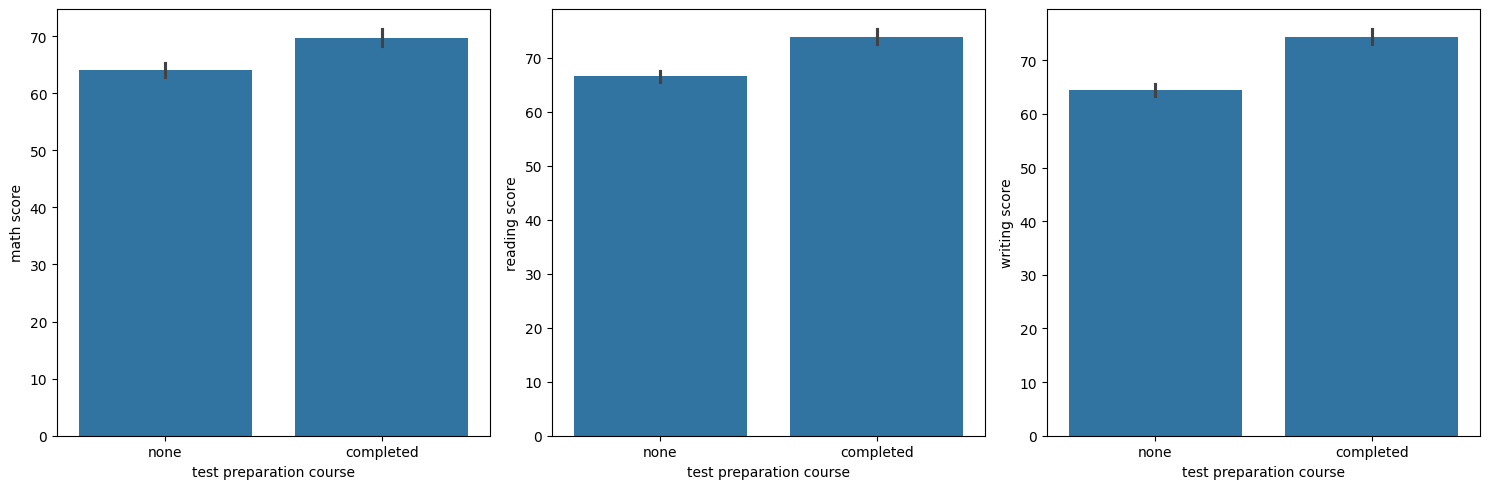

In [102]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot (x=df['test preparation course'], y=df['math score'])
plt.subplot(1,3,2)
sns.barplot (x=df['test preparation course'], y=df['reading score'])
plt.subplot(1,3,3)
sns.barplot (x=df['test preparation course'], y=df['writing score'])

plt.tight_layout();

## Box Plots for Score Distributions

This code generates four box plots to visualize the distribution of scores (Math, Reading, Writing, and Average) in the dataset. Box plots provide insights into the central tendency, spread, and potential outliers in the data. Each subplot represents a different score, and the plots are arranged for easy comparison.

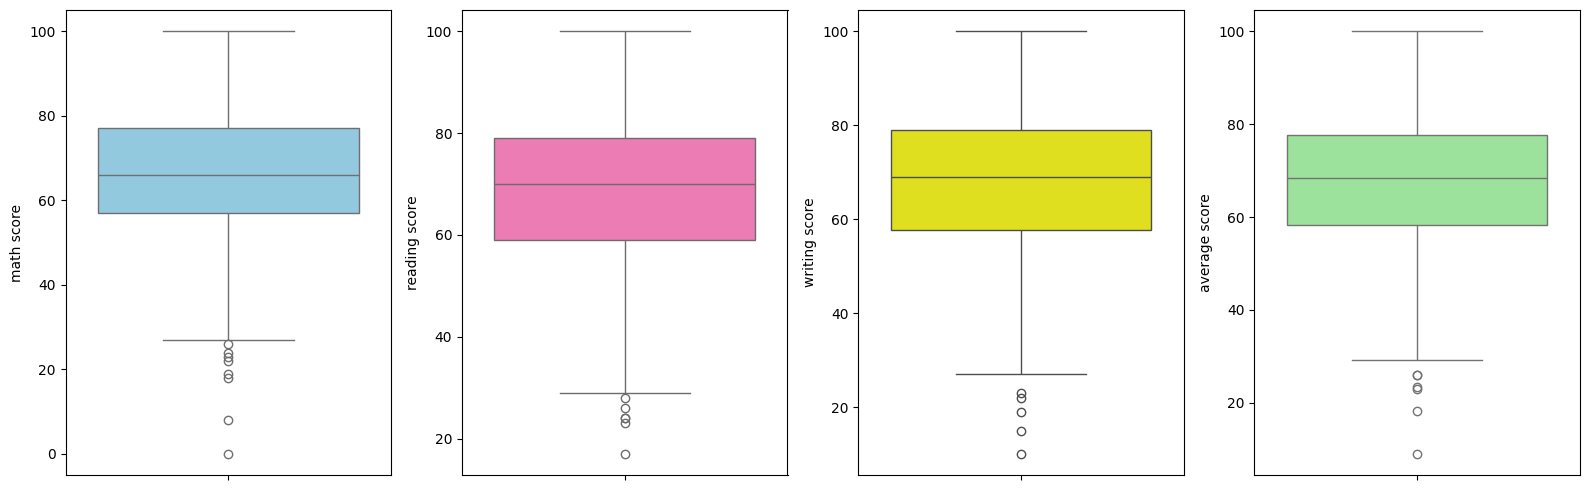

In [105]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'], color='lightgreen')

plt.tight_layout();